<a href="https://colab.research.google.com/github/PhantomXS003/data-analysis-projects/blob/main/time_series_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'], index_col='date')

df = df[
    (df['value'] >= df['value'].quantile(0.025)) &
    (df['value'] <= df['value'].quantile(0.975))
]

def draw_line_plot():
    fig, ax = plt.subplots(figsize=(15, 5))
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016–12/2019")
    ax.set_xlabel("Date")
    ax.set_ylabel("Page Views")
    fig.savefig("line_plot.png")
    return fig

def draw_bar_plot():
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month_name()

    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
    fig = df_bar.plot(kind='bar', figsize=(10, 6)).figure
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.legend(title='Months')
    fig.tight_layout()
    fig.savefig("bar_plot.png")
    return fig

def draw_box_plot():
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    df_box['month_num'] = df_box['date'].dt.month
    df_box = df_box.sort_values('month_num')

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0]).set(
        title="Year-wise Box Plot (Trend)", xlabel="Year", ylabel="Page Views"
    )
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1]).set(
        title="Month-wise Box Plot (Seasonality)", xlabel="Month", ylabel="Page Views"
    )

    fig.savefig("box_plot.png")
    return fig

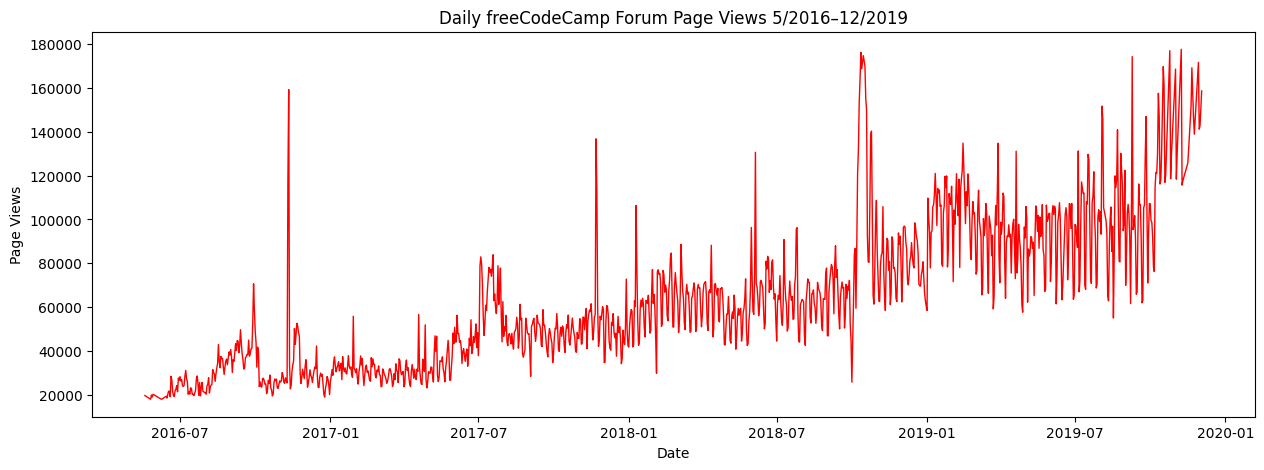

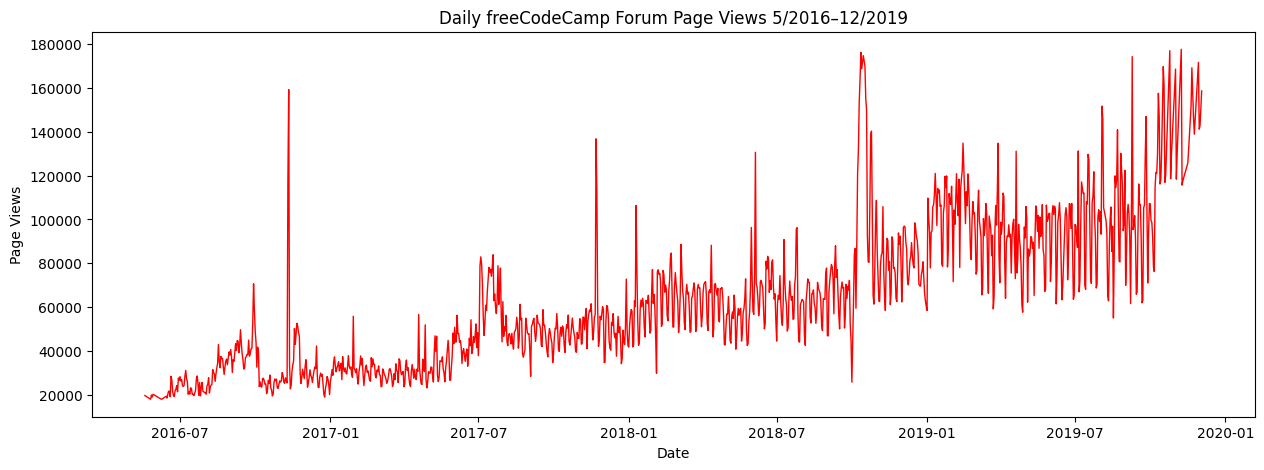

In [ ]:
draw_line_plot()

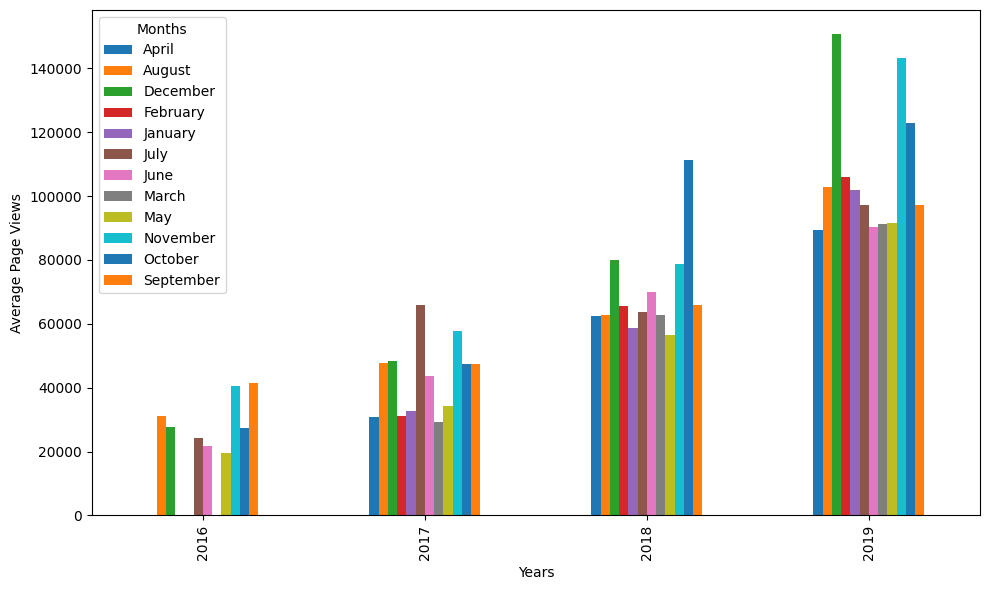

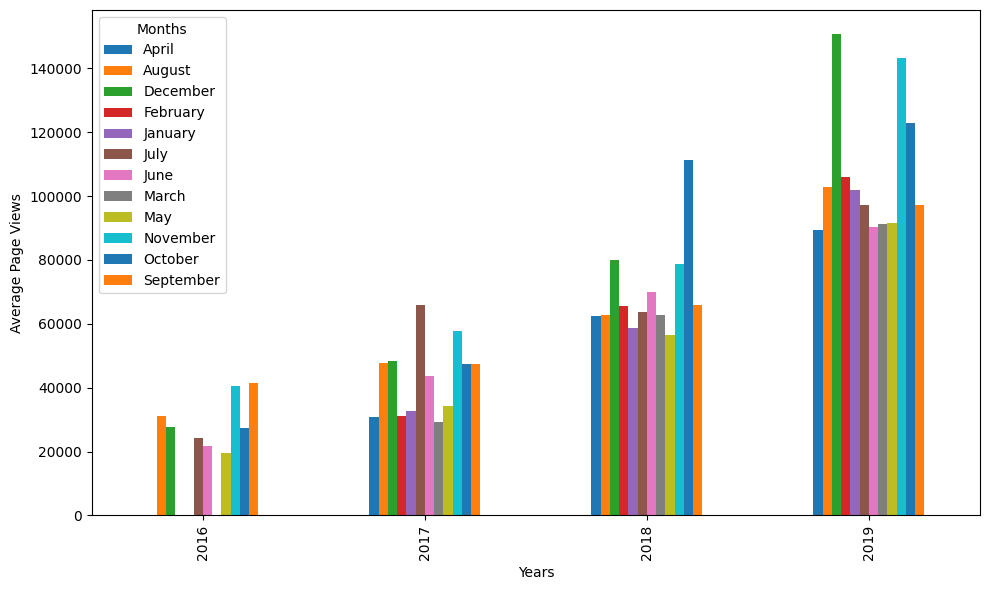

In [ ]:
draw_bar_plot()

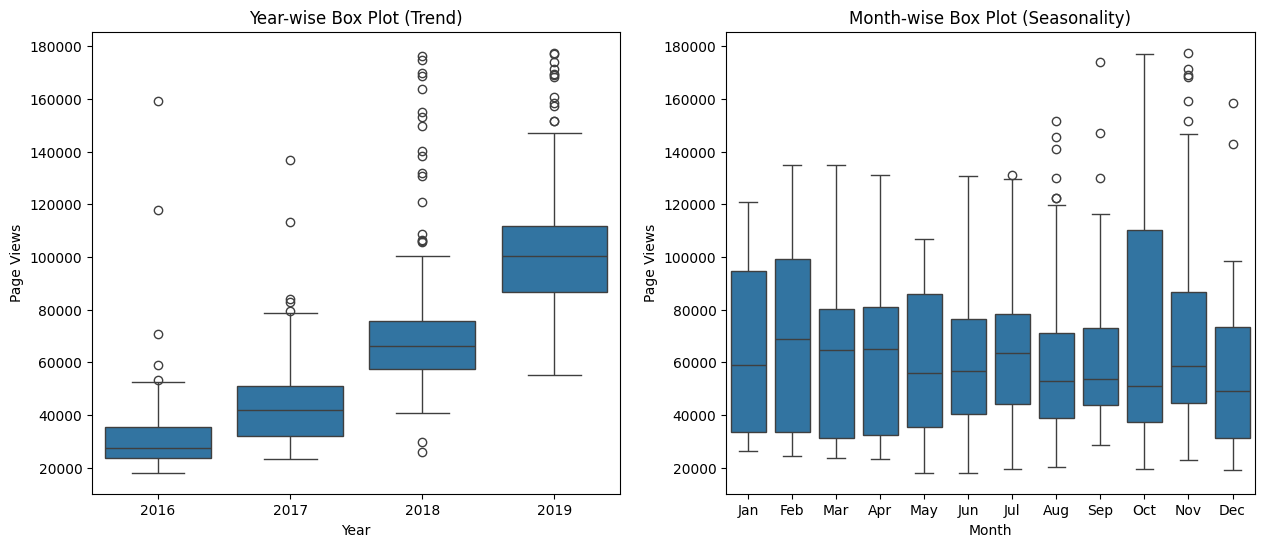

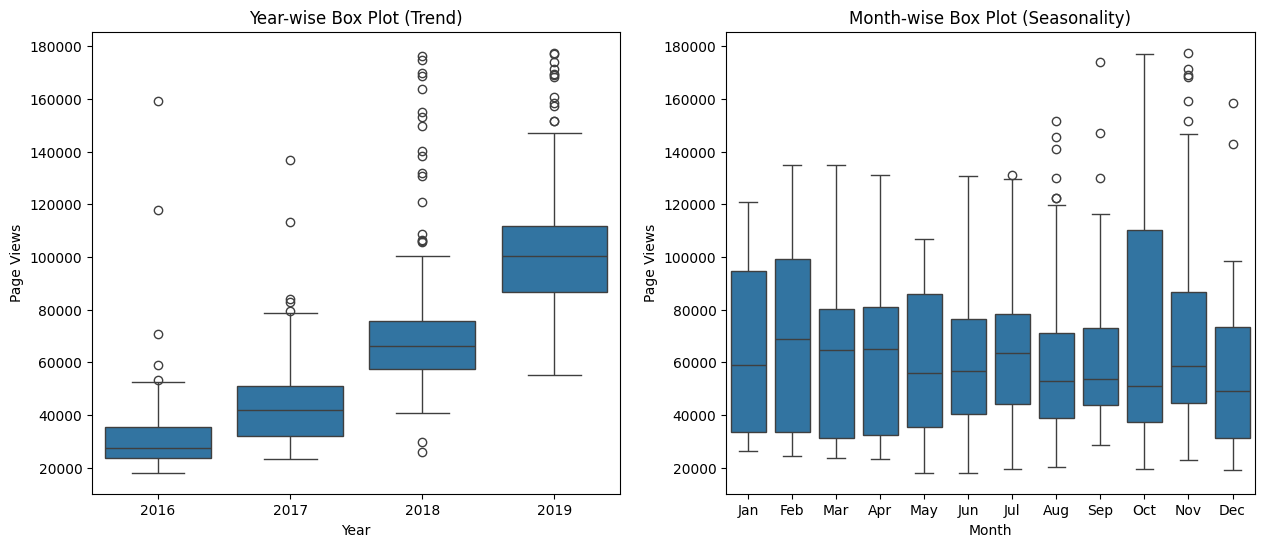

In [ ]:
draw_box_plot()